# Local Agnostic Methods

In this notebook, we will look at local model-agnostic methods for interpreting
machine learning models.

## Naive Bayes: Adult

In [1]:
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from forseti.bayesnet import interpretableNaiveBayes, latentLabelClassifier
from forseti.tree import interpretableTree

sns.set_style('darkgrid')

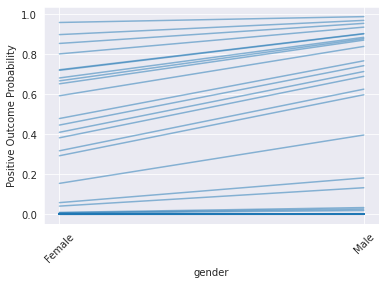

In [2]:
adultsens = pd.read_csv('data/adult.csv')
label = 'income'

model = interpretableNaiveBayes()
model.train(
    label,
    adultsens,
    'NBSens'
)

model.ICEplot('gender', samples=100)

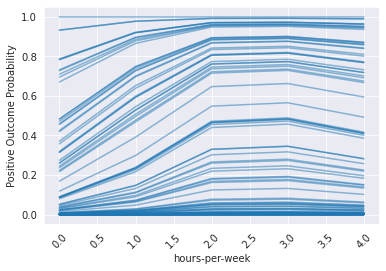

In [5]:
sensitives = ['gender', 'race']
adult = adultsens.drop(sensitives, axis=1)

model = interpretableNaiveBayes()
model.train(
    label,
    adultsens,
    'NB'
)

model.ICEplot('race', samples=100)

## Naive Bayes: Compas

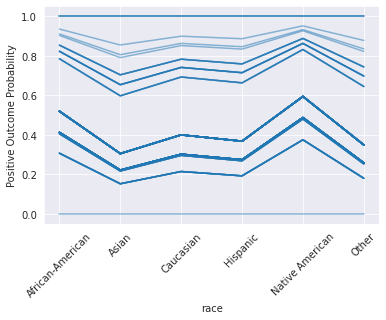

In [6]:
compassens = pd.read_csv('data/compas-two-yrs-recidivism.csv')

features = [
    'race',
    'sex',
    'priors_count',
    'juv_fel_count',
    'juv_misd_count',
    'juv_other_count',
    'c_charge_degree',
    'two_year_recid'
]

compassens = compassens[features]
label = 'two_year_recid'

model = interpretableNaiveBayes()

model.train(
    label,
    compassens,
    'NBSens'
)

model.ICEplot('race', samples=100)

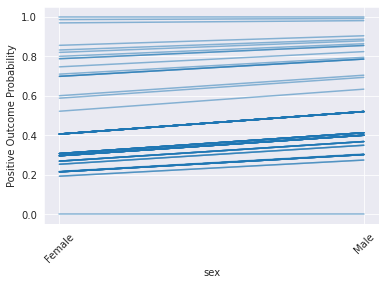

In [7]:
model.ICEplot('sex', samples=100)

## Fair Bayesian Network: Adult

In [8]:
sensitives = ['gender', 'race']
label = 'income'

clf = latentLabelClassifier(
    adultsens,
    sensitives,
    label
)

clf.load('trained-models/fair_model.sav')

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


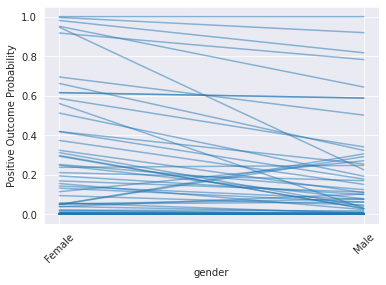

In [9]:
clf.ICEPlot('gender', samples=100)

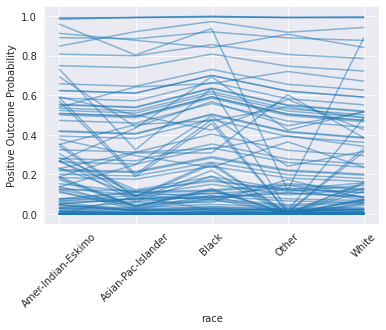

In [10]:
clf.ICEPlot('race', samples=100)

## Fair Bayesian Network: Compas

In [11]:
sensitives = ['sex', 'race']
label = 'two_year_recid'

clf = latentLabelClassifier(
    compassens,
    sensitives,
    label
)

clf.fit()

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


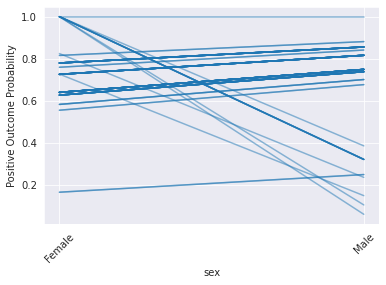

In [12]:
clf.ICEPlot('sex', samples=100)

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


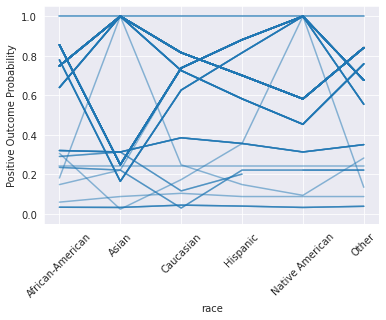

In [13]:
clf.ICEPlot('race', samples=100)

## Fair Random Forest Classifier: Adult Dataset

In [3]:
clf = interpretableTree()

sensitives = ['gender', 'race']

clf.train(
    adultsens,
    sensitives,
    label,
    orth=0.5
)

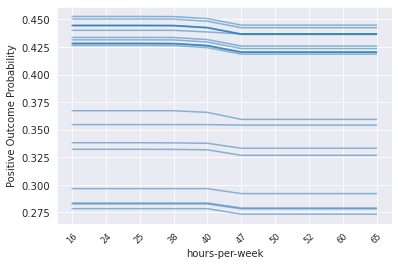

In [11]:
samples=20
attr='hours-per-week'

a = clf.X_test.sample(samples)

df = pd.DataFrame()

codes = list(sorted(a[attr].unique()))

for i, val in enumerate(sorted(a[attr].unique())):
    a[attr] = val
    arr = clf.predict_proba(a)
    arr[:, 0] = i

    df = df.append(
        pd.DataFrame(
            arr,
            columns=['X', 'Positive Predictive Probability']
        )
    )

for idx in df.index.unique():
    plt.plot(
        df.loc[idx]['X'],
        df.loc[idx].iloc[:, 1],
        c='#1f77b4',
        alpha=0.5
    )

    plt.xlabel(attr)
    plt.ylabel('Positive Outcome Probability')
    plt.xticks(range(len(codes)), codes, size='small')
    plt.xticks(rotation=45)